> # **Building TF-IDF From Scratch**

> Step - 1 : Importing the libraries

> Explanation:
- spaCy → tokenization
- numpy → matrix operations
- matplotlib / seaborn → visualization

In [50]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nlp = spacy.load("en_core_web_sm")

> Step - 2 : Pre-processs the text

> - iInput Text

In [51]:
text = """ While noisy text retrieval has been extensively investigated, noisy Text Categorization has been ad
dressed, to our knowledge, in only a few studies [4],[18],[38]. In [4], in which the noisy texts are
obtained from printed documents through OCR, the features describing a text are word substrings
extracted with an iterative procedure. The selection of the features is task dependent and adapted to
the data under consideration. Such an approach enables the modeling of the data noise and makes
categorization more robust. However, if for example the OCR system changed, a new noise model
could be required. In [18], German businness letters recognized with an OCR system (WER ∼20
percent) are attributed to one of five predefined classes. The experiments are performed over a test
set of 42 letters. The rate of correct classification is 57 percent. In [38], the performance of a Naive
Bayes classifier over 400 documents recognized with an OCR (WER ∼14 percent) is presented. Six
categories (out of 52) are analyzed and the highest rate of correct classification achieved is 83.3 per
cent."""


> - Sentence Splitting
    1. Each sentence = one document

In [52]:
doc = nlp(text)

if "sentencizer" not in nlp.pipe_names:
    nlp.add_pipe("sentencizer")

sentences = [sent.text.strip() for sent in doc.sents]

print("Total sentences:", len(sentences))
print(sentences[:2])

Total sentences: 10
['While noisy text retrieval has been extensively investigated, noisy Text Categorization has been ad\ndressed, to our knowledge, in only a few studies [4],[18],[38].', 'In [4], in which the noisy texts are\nobtained from printed documents through OCR, the features describing a text are word substrings\nextracted with an iterative procedure.']


> - Build Vocabulary
    - clean text:
      1. lowercase
      2. only alphabetic
      3. remove punctuation

In [53]:
cleaned_words = []

for sentence in sentences:
    tokens = nlp(sentence)
    for token in tokens:
        if token.is_alpha:
            cleaned_words.append(token.text.lower())

vocab = list(set(cleaned_words))
V = len(vocab)

print("Vocabulary size:", V)

# Create index mapping:
word_to_index = {word: i for i, word in enumerate(vocab)}
print("Vocabulary and index:", word_to_index)

Vocabulary size: 99
Vocabulary and index: {'is': 0, 'letters': 1, 'system': 2, 'predefined': 3, 'robust': 4, 'businness': 5, 'extensively': 6, 'documents': 7, 'describing': 8, 'noise': 9, 'are': 10, 'bayes': 11, 'procedure': 12, 'and': 13, 'features': 14, 'performance': 15, 'new': 16, 'percent': 17, 'test': 18, 'which': 19, 'cent': 20, 'example': 21, 'changed': 22, 'experiments': 23, 'knowledge': 24, 'classifier': 25, 'presented': 26, 'such': 27, 'with': 28, 'selection': 29, 'six': 30, 'adapted': 31, 'under': 32, 'data': 33, 'analyzed': 34, 'few': 35, 'achieved': 36, 'enables': 37, 'texts': 38, 'recognized': 39, 'has': 40, 'only': 41, 'out': 42, 'wer': 43, 'attributed': 44, 'printed': 45, 'over': 46, 'dressed': 47, 'of': 48, 'if': 49, 'model': 50, 'text': 51, 'makes': 52, 'highest': 53, 'however': 54, 'studies': 55, 'categories': 56, 'classification': 57, 'investigated': 58, 'ocr': 59, 'extracted': 60, 'modeling': 61, 'a': 62, 'been': 63, 'word': 64, 'in': 65, 'dependent': 66, 'our': 6

> Step 3 — Compute TF (Term Frequency)

In [54]:
# Initialize matrix
N = len(sentences)
tf_matrix = np.zeros((N, V))

# fill matrix

for i, sentence in enumerate(sentences):
    words = [token.text.lower() for token in nlp(sentence) if token.is_alpha]

    total_words = len(words)

    for word in words:
        if word in word_to_index:
            j = word_to_index[word]
            tf_matrix[i][j] += 1

    # Normalize
    if total_words > 0:
        tf_matrix[i] = tf_matrix[i] / total_words

> Step 4 — Compute DF (Document Frequency)

In [55]:
# Number of documents containing the word
df = np.zeros(V)

for j in range(V):
    df[j] = np.count_nonzero(tf_matrix[:, j])

> Step 5 — Compute IDF

In [56]:
idf = np.log((N + 1) / (df + 1)) + 1

> Step 6 — Compute TF-IDF

In [57]:
tfidf_matrix = tf_matrix * idf

# shape check
print("TF-IDF shape:", tfidf_matrix.shape)

TF-IDF shape: (10, 99)


> Step 7 — Inspect Top Words Per Sentence

In [58]:
for i in range(len(sentences)):
    top_indices = tfidf_matrix[i].argsort()[-5:][::-1]
    top_words = [vocab[j] for j in top_indices]
    print(f"Sentence {i} top words:", top_words)

Sentence 0 top words: ['been', 'has', 'noisy', 'text', 'ad']
Sentence 1 top words: ['in', 'are', 'from', 'word', 'through']
Sentence 2 top words: ['the', 'task', 'consideration', 'dependent', 'selection']
Sentence 3 top words: ['approach', 'more', 'modeling', 'such', 'enables']
Sentence 4 top words: ['for', 'be', 'required', 'could', 'however']
Sentence 5 top words: ['german', 'five', 'classes', 'one', 'predefined']
Sentence 6 top words: ['performed', 'set', 'experiments', 'test', 'over']
Sentence 7 top words: ['correct', 'rate', 'classification', 'percent', 'is']
Sentence 8 top words: ['naive', 'bayes', 'performance', 'classifier', 'presented']
Sentence 9 top words: ['per', 'highest', 'categories', 'out', 'cent']


> Step 10 — Visualize

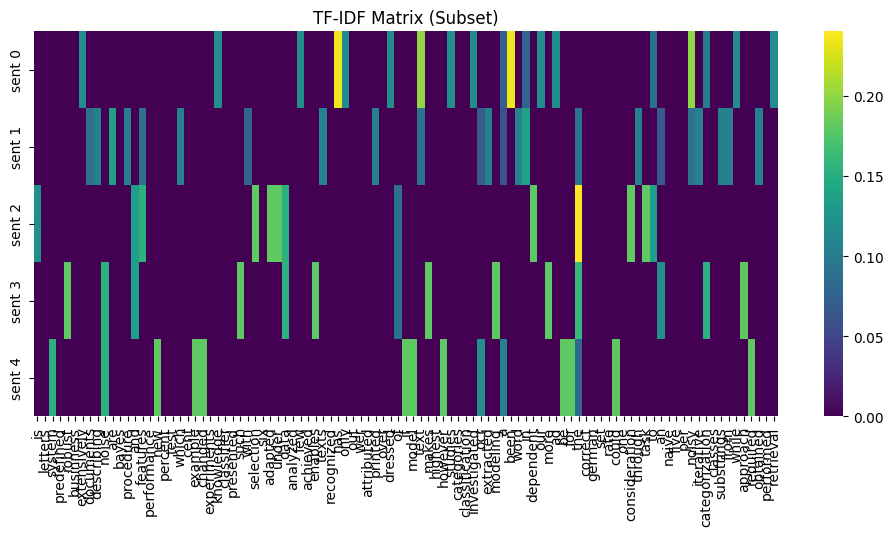

In [59]:
subset = tfidf_matrix[:5]

plt.figure(figsize=(12,5))
sns.heatmap(
    subset,
    cmap="viridis",
    xticklabels=vocab,
    yticklabels=[f"sent {i}" for i in range(min(5, N))]
)
plt.title("TF-IDF Matrix (Subset)")
plt.show()

In [60]:
import heapq

# Get Top Words for One Sentence

sentence_index = 0
top_n = 10

row = tfidf_matrix[sentence_index]

# Get indices of top N values
top_indices = heapq.nlargest(
    top_n,
    range(len(row)),
    key=lambda i: row[i]
)

top_words = [vocab[i] for i in top_indices]
top_scores = [row[i] for i in top_indices]

print(top_words)
print(top_scores)

['has', 'been', 'text', 'noisy', 'extensively', 'knowledge', 'few', 'only', 'dressed', 'studies']
[np.float64(0.2351954862816022), np.float64(0.2351954862816022), np.float64(0.19993765079393572), np.float64(0.19993765079393572), np.float64(0.1175977431408011), np.float64(0.1175977431408011), np.float64(0.1175977431408011), np.float64(0.1175977431408011), np.float64(0.1175977431408011), np.float64(0.1175977431408011)]


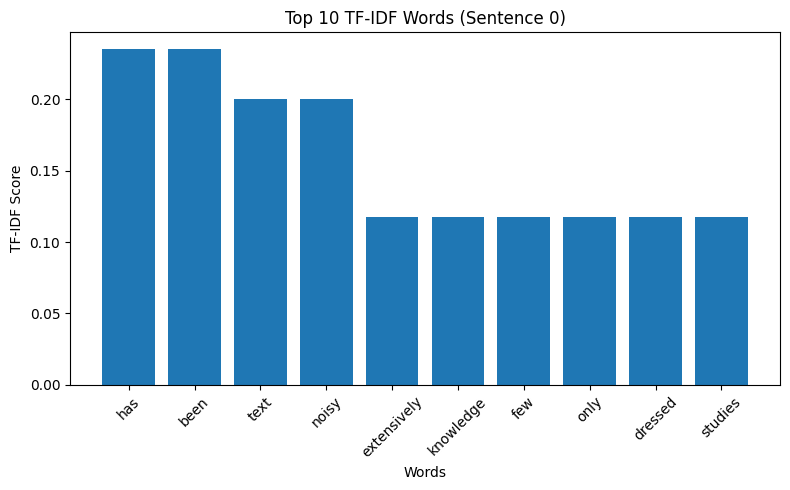

In [61]:
# Visualize with Bar Plot

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top_words, top_scores)
plt.xticks(rotation=45)
plt.title(f"Top {top_n} TF-IDF Words (Sentence {sentence_index})")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.tight_layout()
plt.show()